### Description

In this project we are going to recognize fraudulent credit card transactions so the customers are not charged for items that they did not purchase

The data can be downloaded from: https://www.kaggle.com/mlg-ulb/creditcardfraud

### 1. Library and packages

First we should load the python libraries and packages

In [1]:
# Load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


import random
#Libraries for Saving the Model
from pickle import dump
from pickle import load

In [2]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

### 2. Loading data

Next, we are going to load the dataset, which contains transactions mades by credit cards in september 2013 european cardholders

In [3]:
dataset = read_csv("creditcard.csv")

### 3. Data exploration

Here we will see the number of rows and columns, the type of variables that we are going to work, the number of different clases, if there are outliers and some descriptive analysis.

In [4]:
dataset.shape

(284807, 31)

In [5]:
set_option('display.width', 100)
dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
dataset.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
set_option('display.precision', 3)
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,...,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,284807.000,284807.000
mean,94813.860,1.168e-15,3.417e-16,-1.380e-15,2.074e-15,9.604e-16,1.487e-15,-5.556e-16,1.213e-16,-2.406e-15,...,1.654e-16,-3.569e-16,2.579e-16,4.473e-15,5.341e-16,1.683e-15,-3.660e-16,-1.227e-16,88.350,0.002
std,47488.146,1.959e+00,1.651e+00,1.516e+00,1.416e+00,1.380e+00,1.332e+00,1.237e+00,1.194e+00,1.099e+00,...,7.345e-01,7.257e-01,6.245e-01,6.056e-01,5.213e-01,4.822e-01,4.036e-01,3.301e-01,250.120,0.042
min,0.000,-5.641e+01,-7.272e+01,-4.833e+01,-5.683e+00,-1.137e+02,-2.616e+01,-4.356e+01,-7.322e+01,-1.343e+01,...,-3.483e+01,-1.093e+01,-4.481e+01,-2.837e+00,-1.030e+01,-2.605e+00,-2.257e+01,-1.543e+01,0.000,0.000
25%,54201.500,-9.204e-01,-5.985e-01,-8.904e-01,-8.486e-01,-6.916e-01,-7.683e-01,-5.541e-01,-2.086e-01,-6.431e-01,...,-2.284e-01,-5.424e-01,-1.618e-01,-3.546e-01,-3.171e-01,-3.270e-01,-7.084e-02,-5.296e-02,5.600,0.000
50%,84692.000,1.811e-02,6.549e-02,1.798e-01,-1.985e-02,-5.434e-02,-2.742e-01,4.010e-02,2.236e-02,-5.143e-02,...,-2.945e-02,6.782e-03,-1.119e-02,4.098e-02,1.659e-02,-5.214e-02,1.342e-03,1.124e-02,22.000,0.000
75%,139320.500,1.316e+00,8.037e-01,1.027e+00,7.433e-01,6.119e-01,3.986e-01,5.704e-01,3.273e-01,5.971e-01,...,1.864e-01,5.286e-01,1.476e-01,4.395e-01,3.507e-01,2.410e-01,9.105e-02,7.828e-02,77.165,0.000
max,172792.000,2.455e+00,2.206e+01,9.383e+00,1.688e+01,3.480e+01,7.330e+01,1.206e+02,2.001e+01,1.559e+01,...,2.720e+01,1.050e+01,2.253e+01,4.585e+00,7.520e+00,3.517e+00,3.161e+01,3.385e+01,25691.160,1.000


In [8]:
class_names = {0:'Not fraud',1:'Fraud'}
print(dataset.Class.value_counts().rename(index=class_names))

Not fraud    284315
Fraud           492
Name: Class, dtype: int64


In [9]:
print('Null Values =',dataset.isnull().values.any())
print('nan values =',dataset.isna().sum())

Null Values = False
nan values = Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


there is not null or Nan values


#### 3.1 Data visualization


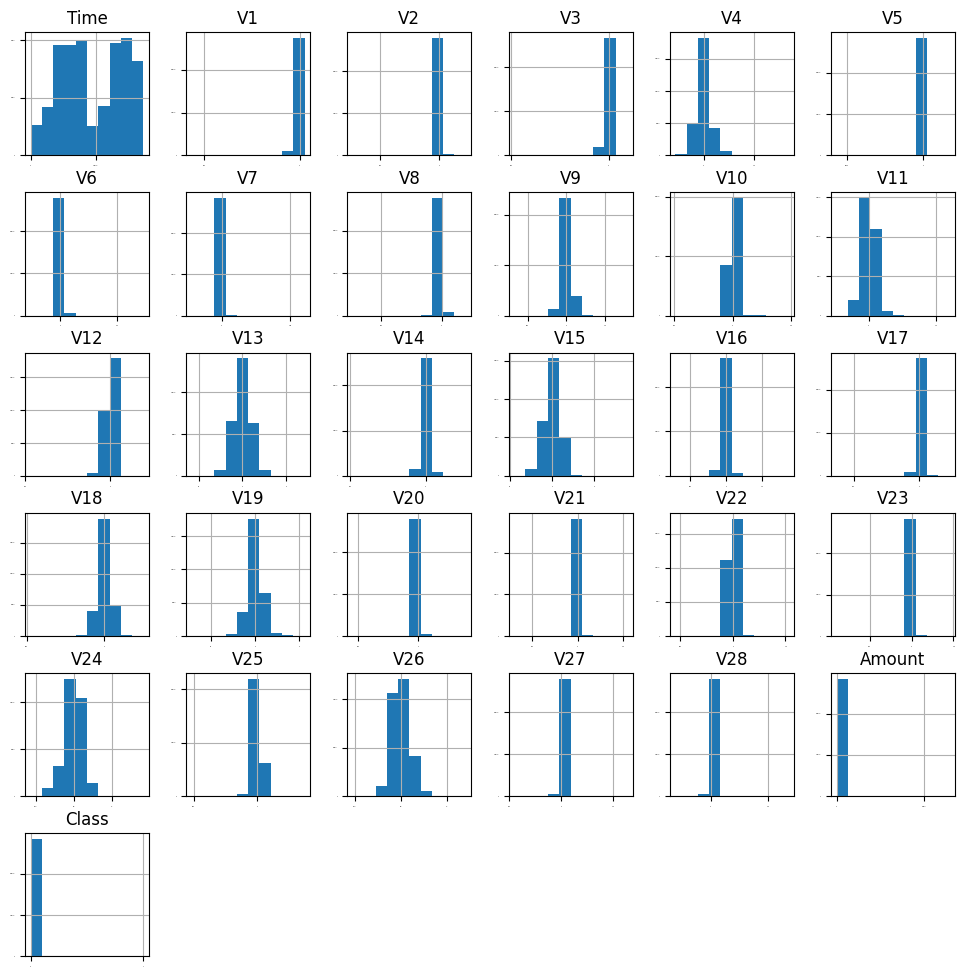

In [10]:
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

I want to know if there is outliers, it appears that there is a lot of them, but we don't know anything about the variables V1 to V28 so is not obvius the decision of droping all the outliers, what I can do is compare the results of training with this dataset and a dataset modified without outliers.

### 4. Data preparation

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest( k=10)
bestfeatures
Y= dataset["Class"]
X = dataset.loc[:, dataset.columns != 'Class']
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

   Specs      Score
17   V17  33979.169
14   V14  28695.548
12   V12  20749.822
10   V10  14057.980
16   V16  11443.349
3     V3  11014.508
7     V7  10349.605
11   V11   6999.355
4     V4   5163.832
18   V18   3584.381


### 5.Training models and evaluate

In [12]:
# split out validation dataset for the end
Y= dataset["Class"]
X = dataset.loc[:, dataset.columns != 'Class']
validation_size = 0.2
seed = random.seed()

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=validation_size, random_state=seed)

scoring = 'accuracy'

# X_train and Y_train: Training data (used for model training)
# X_val and Y_val: Validation data (used for model evaluation and hyperparameter tuning, if needed)


I want to have the classic train/test split and a separate portion of my dataset to evaluate the final model

In [13]:
# test options for classification
num_folds = 10

In [14]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

In [15]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.998881 (0.000177)
LDA: 0.999368 (0.000198)
KNN: 0.998350 (0.000394)
CART: 0.999056 (0.000245)


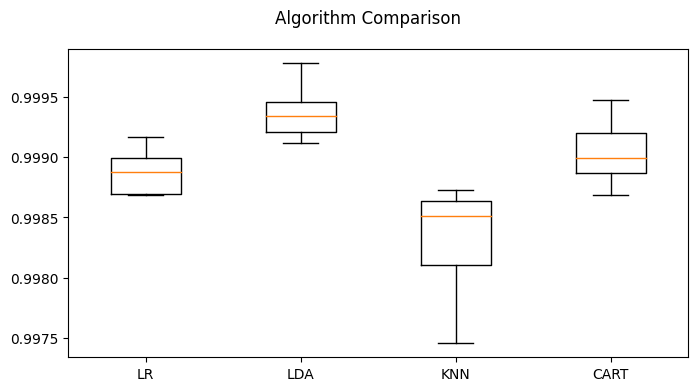

In [16]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
plt.show()

In [17]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [18]:
# estimate accuracy on validation set
#rescaledValidationX = scaler.transform(X_validation)
rescaledValidationX = X_val
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_val, predictions))
print(confusion_matrix(Y_val, predictions))
print(classification_report(Y_val, predictions))

0.9990168884519505
[[56828    41]
 [   15    78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.66      0.84      0.74        93

    accuracy                           1.00     56962
   macro avg       0.83      0.92      0.87     56962
weighted avg       1.00      1.00      1.00     56962



<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

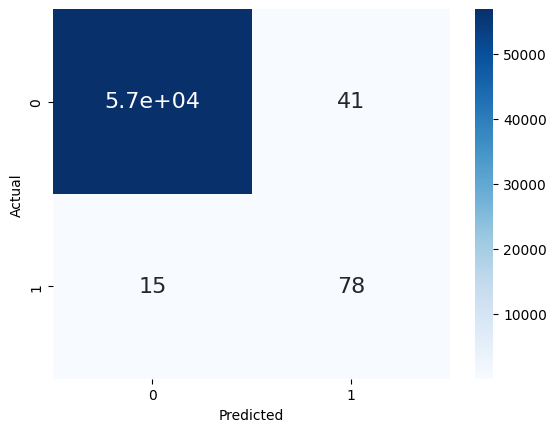

In [19]:
df_cm = pd.DataFrame(confusion_matrix(Y_val, predictions), columns=np.unique(Y_val), index = np.unique(Y_val))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

As we can see we have 22 false negatives, were we predict that is a valid card transaction but it isn't.

It appears that performs evenly well with datasets not used in his training

### 6.Model Tuning

In [20]:
scoring='recall'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

In [21]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.678792 (0.080950)
LDA: 0.761893 (0.085211)
KNN: 0.061597 (0.040902)
CART: 0.760102 (0.054627)


CART seems to have the best recall score, so we choose that model for test evaluation

In [22]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [23]:
# estimate accuracy on validation set
#rescaledValidationX = scaler.transform(X_validation)
rescaledValidationX = X_val
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_val, predictions))
print(confusion_matrix(Y_val, predictions))
print(classification_report(Y_val, predictions))

0.9991046662687406
[[56833    36]
 [   15    78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.68      0.84      0.75        93

    accuracy                           1.00     56962
   macro avg       0.84      0.92      0.88     56962
weighted avg       1.00      1.00      1.00     56962



<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

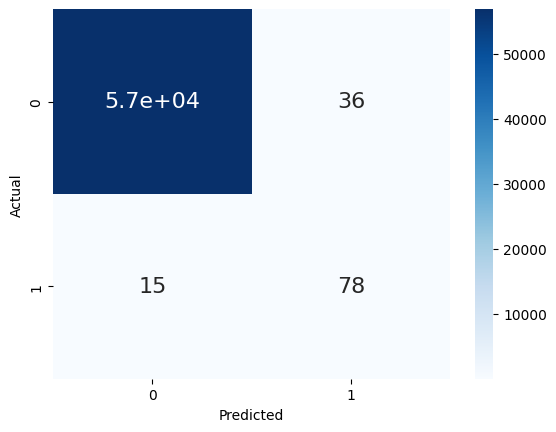

In [24]:
df_cm = pd.DataFrame(confusion_matrix(Y_val, predictions), columns=np.unique(Y_val), index = np.unique(Y_val))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

Focusing in recall scoring makes an improve in our false negatives rate.

#### 6.1 Balanced dataset

Now we are going to tune the model by balancing our training dataset. We already know that there is 492 fraud vs 284315 non fraud, so if we under sample, to have 1:1 ratio, we have a risk to underperform the original accuracy.

In [25]:
df = pd.concat([X_train, Y_train], axis=1)
class_names = {0:'Not fraud',1:'Fraud'}
print(df.Class.value_counts().rename(index=class_names))

Not fraud    227446
Fraud           399
Name: Class, dtype: int64


In [26]:
df = pd.concat([X_train, Y_train], axis=1)
# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:400]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
df_new = normal_distributed_df.sample(frac=1, random_state=seed)
# split out validation dataset for the end
Y_train_new= df_new["Class"]
X_train_new = df_new.loc[:, dataset.columns != 'Class']

Distribution of the Classes in the subsample dataset
0    0.501
1    0.499
Name: Class, dtype: float64


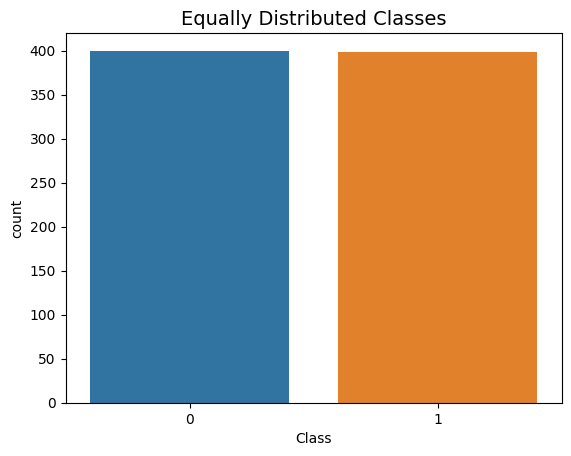

In [27]:
print('Distribution of the Classes in the subsample dataset')
print(df_new['Class'].value_counts()/len(df_new))
sns.countplot(x='Class', data=df_new)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

Now that we have our dataframe correctly balanced, we can go further with our analysis and data preprocessing.
Given the total number of data points are around 1200, we try all the Models including Deep Learning Models. 
However, given the data is balanced, the metric used here is accuracy, as it focuses on both false positive and false negative. 

In [28]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#Neural Network
models.append(('NN', MLPClassifier()))
# #Ensable Models 
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

In [29]:
results = []
names = []
scoring='accuracy'
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train_new, Y_train_new, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.933639 (0.021797)
LDA: 0.912389 (0.031127)
KNN: 0.637089 (0.049706)
CART: 0.913703 (0.033682)
NB: 0.868592 (0.035441)
SVM: 0.538070 (0.065647)
NN: 0.575949 (0.095671)
AB: 0.918655 (0.021805)
GBM: 0.937468 (0.023667)
RF: 0.934984 (0.030489)
ET: 0.929858 (0.027722)


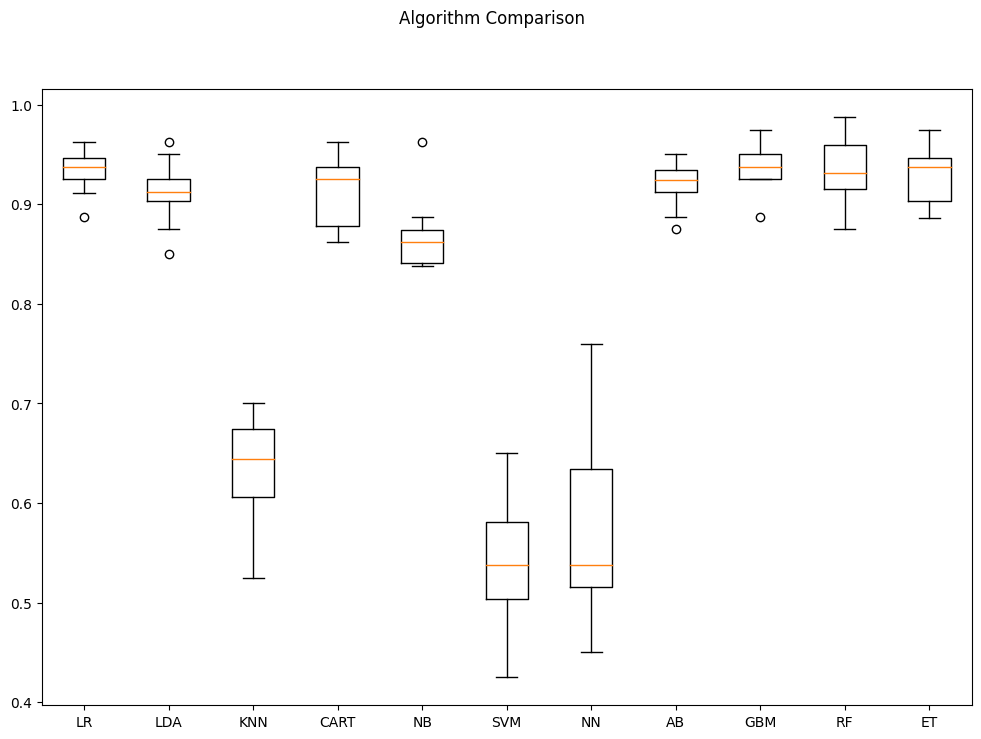

In [30]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(12,8)
plt.show()

In [31]:
model = DecisionTreeClassifier()
model.fit(X_train_new, Y_train_new)

DecisionTreeClassifier()

In [32]:
# estimate accuracy on validation set
#rescaledValidationX = scaler.transform(X_validation)
rescaledValidationX = X_val
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_val, predictions))
print(confusion_matrix(Y_val, predictions))
print(classification_report(Y_val, predictions))

0.8880306169024964
[[50495  6374]
 [    4    89]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     56869
           1       0.01      0.96      0.03        93

    accuracy                           0.89     56962
   macro avg       0.51      0.92      0.48     56962
weighted avg       1.00      0.89      0.94     56962



<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

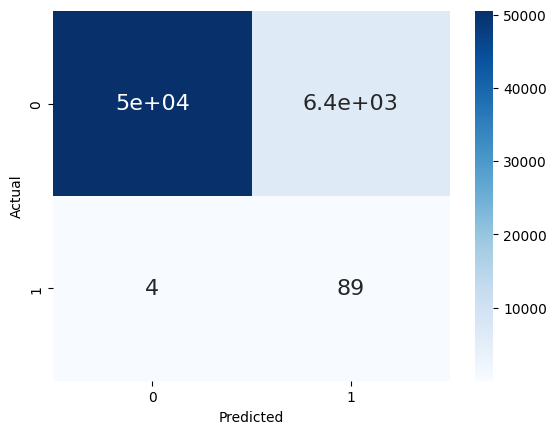

In [33]:
df_cm = pd.DataFrame(confusion_matrix(Y_val, predictions), columns=np.unique(Y_val), index = np.unique(Y_val))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [34]:
# prepare model
model = GradientBoostingClassifier(max_depth= 3, n_estimators = 1000)
model.fit(X_train_new, Y_train_new)

GradientBoostingClassifier(n_estimators=1000)

In [35]:
# estimate accuracy on Original validation set
predictions = model.predict(X_val)
print(accuracy_score(Y_val, predictions))
print(confusion_matrix(Y_val, predictions))
print(classification_report(Y_val, predictions))

0.9513008672448299
[[54100  2769]
 [    5    88]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56869
           1       0.03      0.95      0.06        93

    accuracy                           0.95     56962
   macro avg       0.52      0.95      0.52     56962
weighted avg       1.00      0.95      0.97     56962



<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

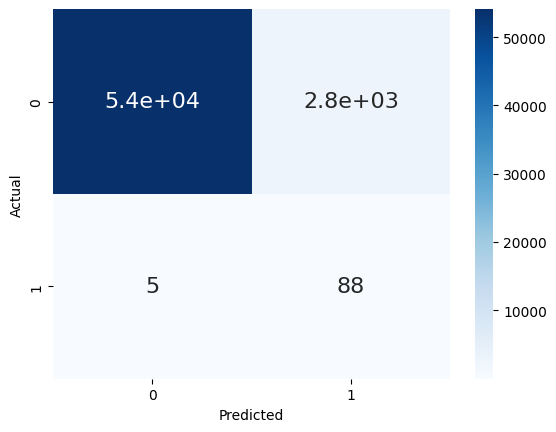

In [36]:
df_cm = pd.DataFrame(confusion_matrix(Y_val, predictions), columns=np.unique(Y_val), index = np.unique(Y_val))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [37]:
model=RandomForestClassifier()
model.fit(X_train_new,Y_train_new)

RandomForestClassifier()

In [38]:
# estimate accuracy on Original validation set
predictions = model.predict(X_val)
print(accuracy_score(Y_val, predictions))
print(confusion_matrix(Y_val, predictions))
print(classification_report(Y_val, predictions))

0.965749095888487
[[54924  1945]
 [    6    87]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56869
           1       0.04      0.94      0.08        93

    accuracy                           0.97     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.97      0.98     56962



<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

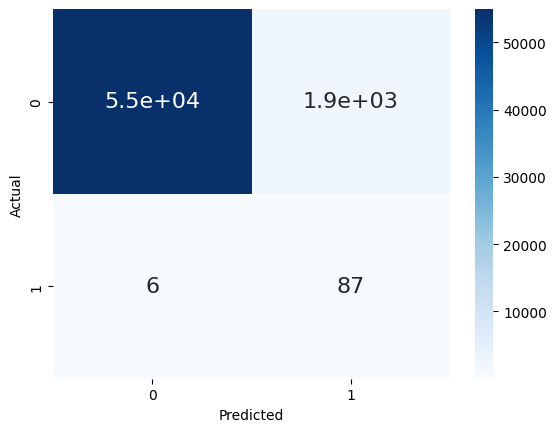

In [39]:
df_cm = pd.DataFrame(confusion_matrix(Y_val, predictions), columns=np.unique(Y_val), index = np.unique(Y_val))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

Vamos a proceder de forma paralela normalizando los datos para evitar long tail distributions

In [40]:
# split out validation dataset for the end
Y= dataset["Class"]
X = dataset.loc[:, dataset.columns != 'Class']

In [41]:
X_norm = np.arcsinh(X)

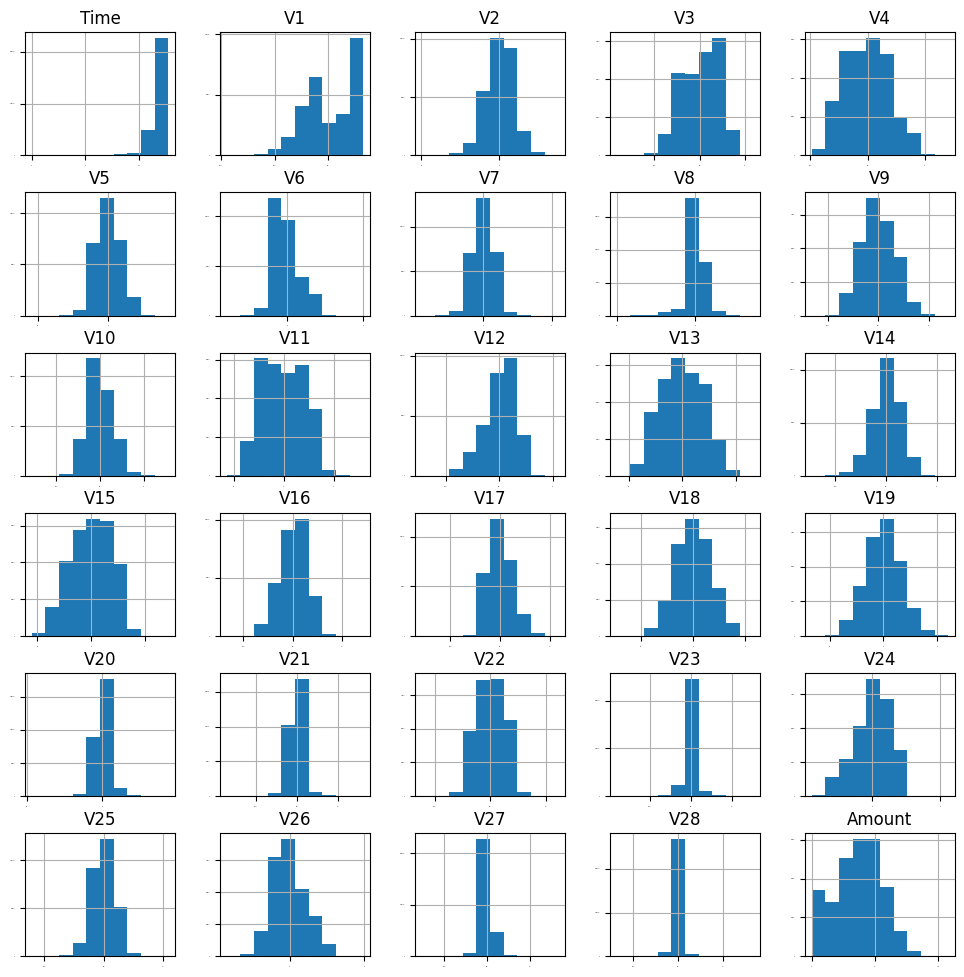

In [42]:
X_norm.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

In [43]:
validation_size = 0.2


X_train, X_val, Y_train, Y_val = train_test_split(X_norm, Y, test_size=validation_size, random_state=seed)

scoring = 'recall'

# X_train and Y_train: Training data (used for model training)
# X_val and Y_val: Validation data (used for model evaluation and hyperparameter tuning, if needed)

In [44]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

In [45]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.724781 (0.075960)
LDA: 0.801585 (0.039265)
KNN: 0.785930 (0.043831)
CART: 0.777163 (0.042969)


In [46]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [47]:
# estimate accuracy on validation set
#rescaledValidationX = scaler.transform(X_validation)
rescaledValidationX = X_val
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_val, predictions))
print(confusion_matrix(Y_val, predictions))
print(classification_report(Y_val, predictions))

0.9992977774656788
[[56842    14]
 [   26    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.85      0.75      0.80       106

    accuracy                           1.00     56962
   macro avg       0.93      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

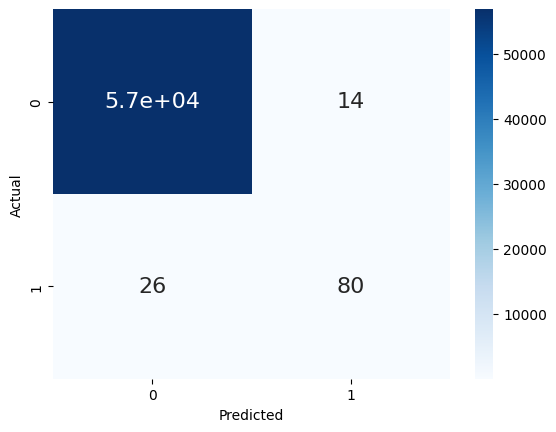

In [48]:
df_cm = pd.DataFrame(confusion_matrix(Y_val, predictions), columns=np.unique(Y_val), index = np.unique(Y_val))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [49]:
df = pd.concat([X_train, Y_train], axis=1)
class_names = {0:'Not fraud',1:'Fraud'}
print(df.Class.value_counts().rename(index=class_names))

Not fraud    227459
Fraud           386
Name: Class, dtype: int64


In [50]:
df = pd.concat([X_train, Y_train], axis=1)
# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:392]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
df_new = normal_distributed_df.sample(frac=1, random_state=seed)
# split out validation dataset for the end
Y_train_new= df_new["Class"]
X_train_new = df_new.loc[:, dataset.columns != 'Class']

In [51]:
X_train_new.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,778.000,778.000,778.000,778.000,778.000,778.000,778.000,778.000,778.000,778.000,...,778.000,778.000,778.000,778.000,778.000,778.000,778.000,778.000,778.000,778.000
mean,11.830,-0.669,0.822,-1.030,0.993,-0.520,-0.505,-0.864,0.258,-0.680,...,0.138,0.256,0.008,-0.005,-0.026,0.036,0.024,0.125,0.050,3.447
std,0.809,1.527,1.296,1.567,1.332,1.387,1.032,1.407,1.230,1.131,...,0.646,0.864,0.741,0.556,0.505,0.537,0.432,0.638,0.352,2.083
min,6.850,-4.113,-2.825,-4.131,-2.108,-3.789,-2.556,-4.467,-4.408,-3.292,...,-2.125,-3.820,-2.881,-3.466,-1.412,-1.976,-0.985,-2.681,-1.349,0.000
25%,11.422,-1.762,-0.093,-2.335,-0.021,-1.352,-1.271,-1.861,-0.227,-1.608,...,-0.191,-0.163,-0.540,-0.250,-0.380,-0.292,-0.273,-0.054,-0.052,1.346
50%,11.949,-0.700,0.871,-1.109,1.117,-0.430,-0.606,-0.667,0.167,-0.654,...,0.013,0.163,0.034,-0.033,0.019,0.050,-0.014,0.060,0.036,3.402
75%,12.495,0.909,1.815,0.358,2.165,0.493,0.074,0.266,0.782,0.204,...,0.467,0.635,0.566,0.181,0.383,0.380,0.322,0.441,0.217,5.267
max,12.753,1.592,3.787,2.027,3.189,3.102,2.567,2.043,3.690,2.065,...,3.098,3.997,2.820,2.400,0.994,1.533,1.510,1.721,1.340,8.010


Distribution of the Classes in the subsample dataset
0    0.504
1    0.496
Name: Class, dtype: float64


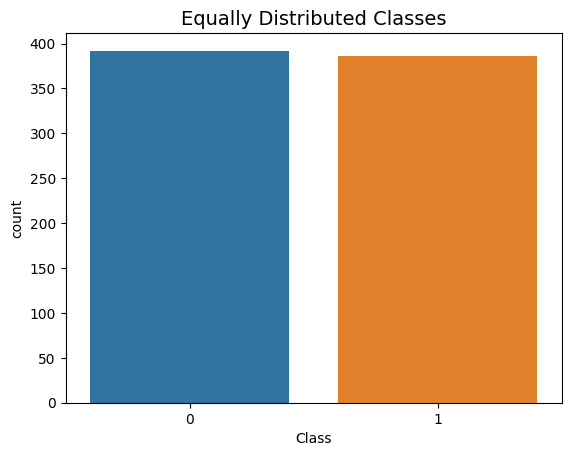

In [52]:
print('Distribution of the Classes in the subsample dataset')
print(df_new['Class'].value_counts()/len(df_new))
sns.countplot(x='Class', data=df_new)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [53]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#Neural Network
models.append(('NN', MLPClassifier()))
# #Ensable Models 
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

In [54]:
results = []
names = []
scoring='accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train_new, Y_train_new, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.940859 (0.018384)
LDA: 0.938378 (0.024129)
KNN: 0.935698 (0.031542)
CART: 0.890793 (0.038455)
NB: 0.919014 (0.033992)
SVM: 0.936946 (0.022893)
NN: 0.935698 (0.023824)
AB: 0.925408 (0.026306)
GBM: 0.936996 (0.017715)
RF: 0.935764 (0.016140)
ET: 0.940892 (0.022328)


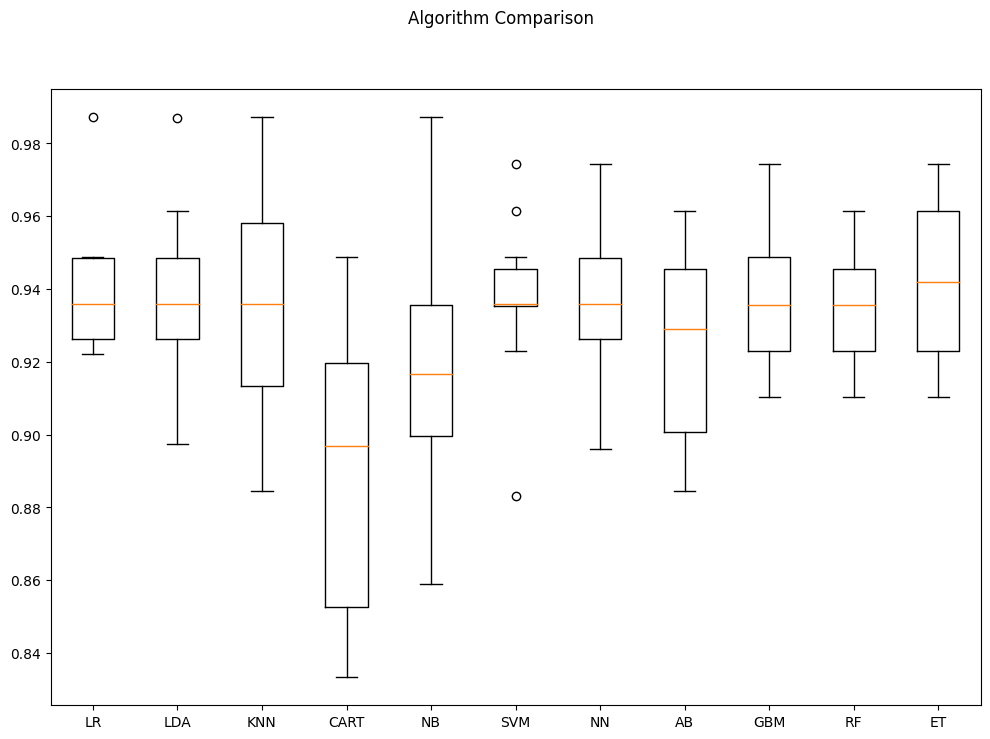

In [55]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(12,8)
plt.show()

In [56]:
model = MLPClassifier()
model.fit(X_train_new, Y_train_new)

MLPClassifier()

In [57]:
# estimate accuracy on Original validation set
predictions = model.predict(X_val)
print(accuracy_score(Y_val, predictions))
print(confusion_matrix(Y_val, predictions))
print(classification_report(Y_val, predictions))

0.9656262069449809
[[54905  1951]
 [    7    99]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56856
           1       0.05      0.93      0.09       106

    accuracy                           0.97     56962
   macro avg       0.52      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

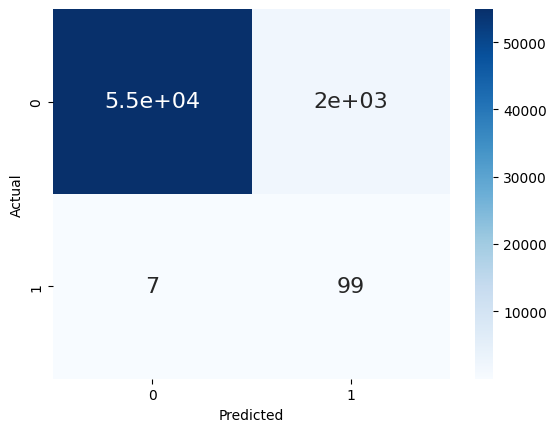

In [58]:
df_cm = pd.DataFrame(confusion_matrix(Y_val, predictions), columns=np.unique(Y_val), index = np.unique(Y_val))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [59]:
!pip install imbalanced-learn

In [60]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
ros = RandomOverSampler(sampling_strategy=0.5)
X_over,Y_over=ros.fit_resample(X, Y)

In [61]:
Y_over


0         0
1         0
2         0
3         0
4         0
         ..
426467    1
426468    1
426469    1
426470    1
426471    1
Name: Class, Length: 426472, dtype: int64

In [62]:
df = pd.concat([X_over, Y_over], axis=1)
class_names = {0:'Not fraud',1:'Fraud'}
print(df.Class.value_counts().rename(index=class_names))

Not fraud    284315
Fraud        142157
Name: Class, dtype: int64


In [63]:
validation_size = 0.2


X_train, X_val, Y_train, Y_val = train_test_split(X_over, Y_over, test_size=validation_size, random_state=seed)

scoring = 'recall'

# X_train and Y_train: Training data (used for model training)
# X_val and Y_val: Validation data (used for model evaluation and hyperparameter tuning, if needed)

In [64]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

In [65]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.894783 (0.013638)
LDA: 0.790787 (0.003400)
KNN: 1.000000 (0.000000)
CART: 1.000000 (0.000000)


In [66]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [67]:
# estimate accuracy on validation set
#rescaledValidationX = scaler.transform(X_validation)
rescaledValidationX = X_val
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_val, predictions))
print(confusion_matrix(Y_val, predictions))
print(classification_report(Y_val, predictions))

0.9996365554839088
[[56866    31]
 [    0 28398]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56897
           1       1.00      1.00      1.00     28398

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295



<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

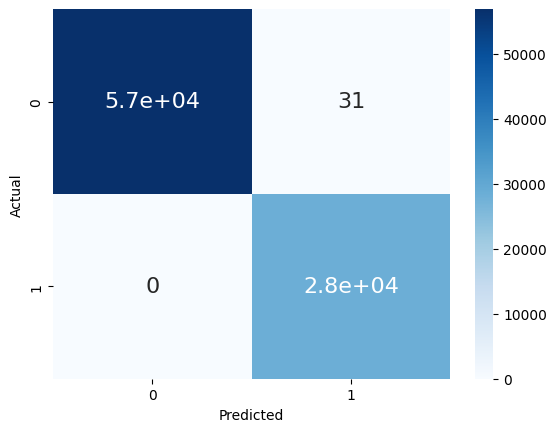

In [68]:
df_cm = pd.DataFrame(confusion_matrix(Y_val, predictions), columns=np.unique(Y_val), index = np.unique(Y_val))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size